# Transformada de Fourier

Renato Naville Watanabe

## Preparação do ambiente

In [1]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib widget

## Motivação



Vamos começar analisando a série de Fourier do sinal mostrado abaixo:

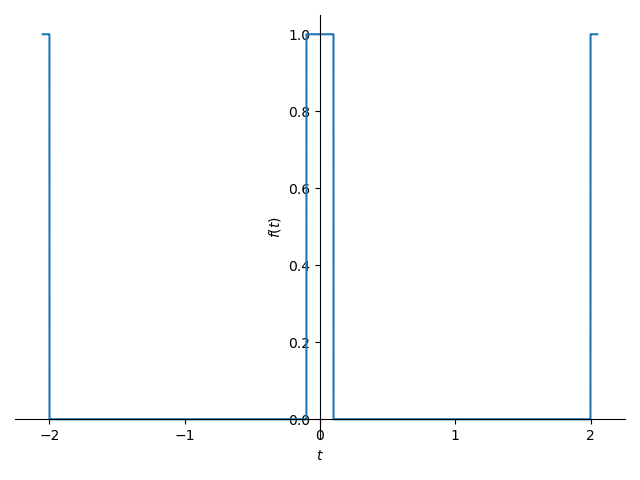

In [3]:
t = sym.symbols('t')
x = sym.Heaviside(t+0.1) - sym.Heaviside(t-0.1) + sym.Heaviside(t-2) + sym.Heaviside(t+2.1) - sym.Heaviside(t+2)
y = sym.symbols('y')
p1 = sym.plot(x, (t, -2.05, 2.05))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([-2.1, -0.1, 0.1, 2.1])
ax.set_xticklabels([r'$-T$', r'-0.1', r'0.1', r'$T$'])
ax.set_yticks([1])
ax.set_yticklabels(['1'])
fig.canvas.draw_idle()

Ele é um pulso que tem 0.2 segundos de duração no valor 1 e se repete a cada T segundos.

A série de Fourier desse sinal é:

$a_n = \int_{-0.1}^{0.1}e^{-jn\frac{2\pi}{T}t}\,dt = \left.\frac{e^{-jn\frac{2\pi}{T}t}}{-jn\frac{2\pi}{T}}\right|_{t=-0.1}^{0.1} = \frac{e^{jn\frac{0,2\pi}{T}}-e^{-jn\frac{0,2\pi}{T}}}{jn\frac{2\pi}{T}} = 2\frac{\mathrm{sen}(n\frac{0,2\pi}{T})}{n\frac{2\pi}{T}}$

A frequência angular correspondente a cada $n$ é $\omega = n\frac{2\pi}{T}$. Então, podemos reescrever $a_n$ como:

$a_n = \left.2\frac{\mathrm{sen}(0,1\omega)}{\omega}\right|_{\omega=n\omega_0}$

Em que $\omega_0 = \frac{2\pi}{T}$. Perceba que se aumentarmos $T$, a frequência fundamental $\omega_0$ diminui. Podemos fazer o gráfico dos coeficientes da série de Fourier para diferentes valores de $T$.

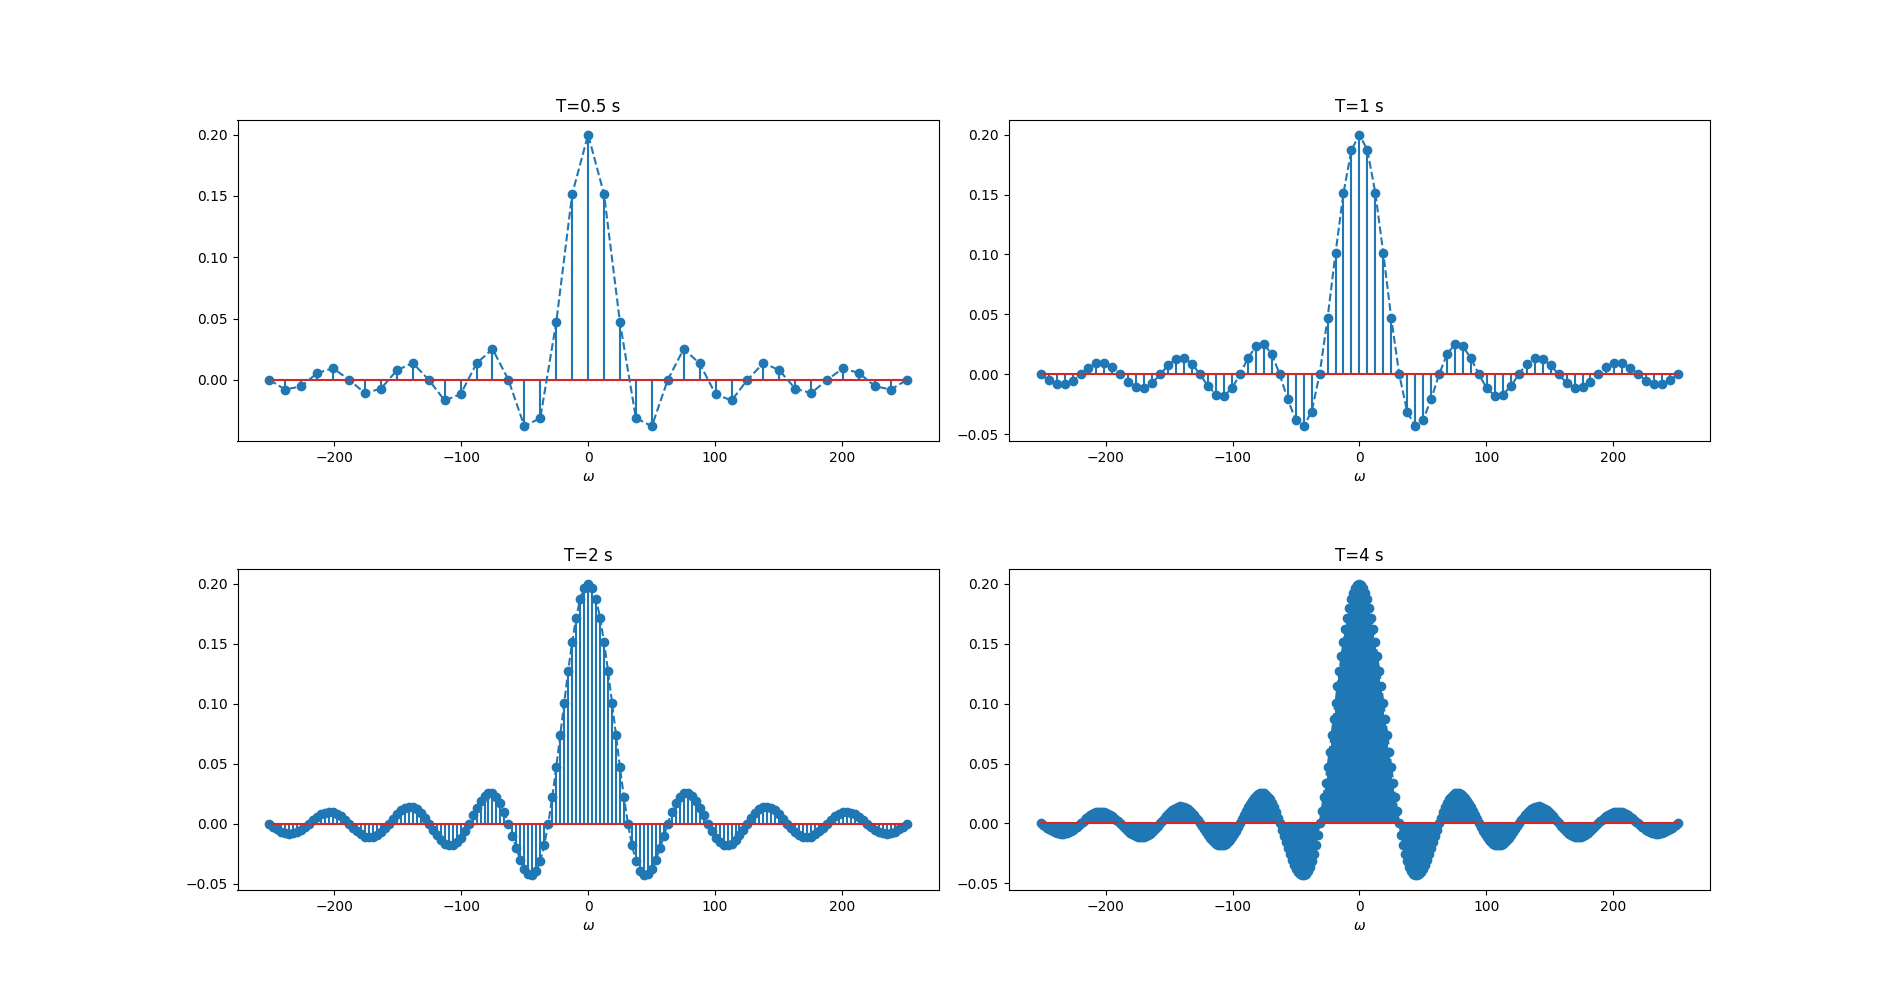

In [7]:
T = [0.5, 1, 2, 4]

p = dict()
plt.figure(figsize=(19,10))
T1=0.1
for i in range(len(T)):
    plt.subplot(2,2, i+1)
    k = np.arange(-20*2**(i), 20*2**(i)+1)
    omega = 2*np.pi/T[i]*k
    f = 0.2*np.ones(len(omega))
    f[k!=0] = 2*np.sin(omega[k!=0]*T1)/(omega[k!=0])
    plt.stem(omega, f)
    plt.plot(omega, f, '--')
    plt.xlabel(r'$\omega$')
    plt.title('T='+str(T[i])+' s')

plt.subplots_adjust(hspace=0.4, wspace=0.1)
plt.show()



O gráfico dos coeficientes segue a mesma envoltória, mas os coeficientes se aproximam uns dos outros conforme o valor de $T$ aumenta.

O que Joseph Fourier tentou responder é o que aconteceria se $T$ tendesse ao infinito. Nesse caso, poderíamos representar sinais não periódicos (um sinal não periódico é um sinal com período infinito). Vendo os gráficos acima, podemos intuir que se $T$ for para o infinito, a distância entre cada coeficiente será infinitesimal. Dessa intuição que surgiu a Transformada de Fourier.

## Definição


Com isso, a definição da Transformada de Fourier é:

$X(j\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt$

A transformada de Fourier de um sinal é conhecida como o **espectro** do sinal.

Diferentemente da série de Fourier, é possível calcular a Transformada de Fourier para qualquer sinal:

---

### Exemplo 1

Vamos calcular a transformada de Fourier de:

$x(t) = e^{-2t}u(t)$

$X(j\omega) = \int_{-\infty}^{\infty}e^{-2t}u(t)e^{-j\omega t}\,dt = \int_{0}^{\infty}e^{-(2+j\omega)t}\,dt = \left.\frac{e^{-(2+j\omega)t}}{-(2+j\omega)}\right|_{t=0}^\infty = \frac{0-1}{-(2+j\omega)} =  \frac{1}{2+j\omega}$

Podemos fazer o gráfico do módulo e da fase de $X(j\omega)$.

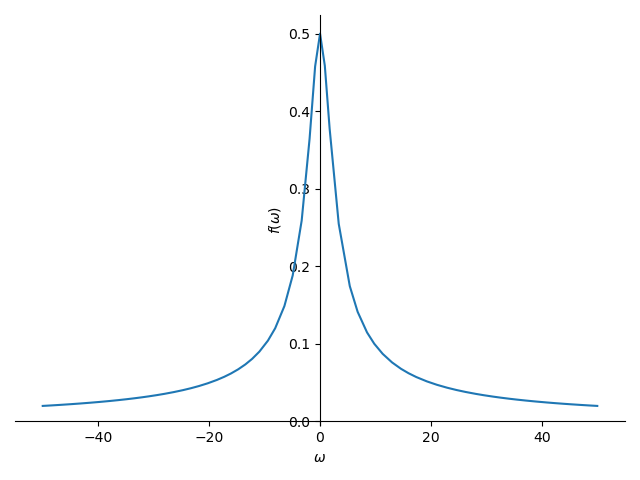

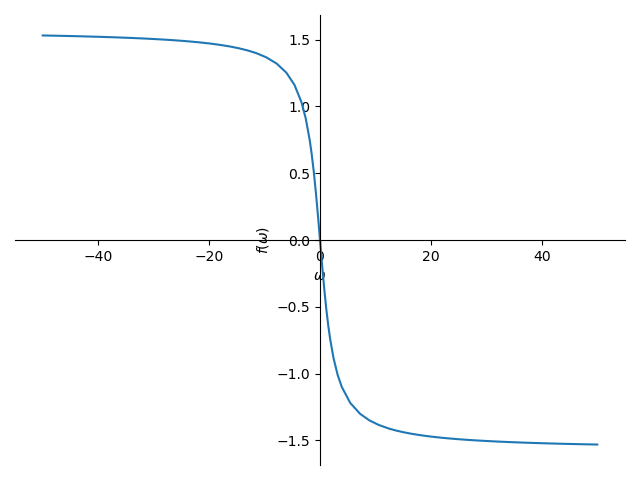

In [4]:
omega = sym.symbols('\omega')
X = 1/(2+sym.I*omega)
sym.plot(sym.Abs(X), (omega, -50, 50))
sym.plot(sym.arg(X), (omega, -50, 50))

---

A transformada de Fourier é indicada pelo operador $\mathcal{F}$.

$\mathcal{F}(x(t)) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}\,dt $

---

### Exemplo 2

Agora vamos calcular a transformada de Fourier de:

$x(t) = \delta(t-t_0)$

A transformada de Fourier é:


$X(j\omega) = \int_{-\infty}^\infty\delta(t-t_0)e^{-j\omega t}\,dt =  \int_{-\infty}^\infty\delta(t-t_0)e^{-j\omega t_0}\,dt =  e^{-j\omega t_0}\int_{-\infty}^\infty\delta(t-t_0)\,dt =  e^{-j\omega t_0}$

---

## Transformada de Fourier inversa

A partir da expressão de uma transformada de Fourier, podemos voltar ao sinal que deu origem àquela transformada pela seguinte expressão:

$\mathcal{F}^{-1}(X(j\omega)) = \frac{1}{2\pi}\int_{-\infty}^\infty X(j\omega)e^{j\omega t}\,d\omega$




---

### Exemplo 3

Vamos obter o sinal $x(t)$ que deu origem a:

$X(j\omega) = 2\pi\delta(\omega)$

Então,

$x(t) = \frac{1}{2\pi}\int_{-\infty}^\infty 2\pi\delta(\omega)e^{j\omega t}\,d\omega = \int_{-\infty}^\infty \delta(\omega)\,d\omega  = 1$


Ou seja, a transformada de Fourier do sinal constante é um impulso em $\omega=0$.

---

Seria muito difícil fazer a transformada de Fourier do sinal constante. É mais fácil fazer a operação inversa. 

## Linearidade da transfromada de Fourier

A transformada de Fourier é uma operação linear. Isso significa que se

$\mathcal{F}(x_1(t)) = X_1(j\omega)$ e $\mathcal{F}(x_2(t)) = X_2(j\omega)$

então:

$\boxed{\mathcal{\mathcal{F}}(ax_1(t)+bx_2(t)) = aX_1(j\omega)+bX_2(j\omega)}$

## Propriedade da dualidade frequência-tempo

Uma propriedade que facilita muito a obtenção da transformada de Fourier de um sinal é a propriedade da dualidade frequência-tempo. Essa propriedade diz que se a transformada de um sinal $x(t)$ é conhecida:

$\mathcal{F}(x(t)) = X(j\omega)$

então:

$\boxed{\mathcal{F}(X(t)) = 2\pi x(-j\omega)}$

-**Prova** 

$x(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X(j\omega)e^{j\omega t}\,d\omega$

Trocando $\omega$ por $t$ e $t$ por $-\omega$ na última expressão, temos:

$x(-j\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X(t)e^{-jt \omega}\,dt$

Chegamos a:

$2\pi x(-j\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty}X(t)e^{-jt \omega}\,dt$

---

### Exemplo 4

Vamos calcular a transformada de Fourier de

$x(t) = \cos(3t)$

Podemos reescrever $x(t)$ como:

$x(t) = \frac{e^{j3t}+e^{-j3t}}{2}$


Pela propridade da linearidade:

$X(j\omega) = \frac{1}{2}\mathcal{F}(e^{j3t})+ \frac{1}{2}\mathcal{F}(e^{-j3t})$

No exemplo 2, vimos que $\mathcal{F}(\delta(t-t_0)) = e^{-j\omega t_0}$. Então, pela propriedade da dualidade:

$\mathcal{F}(e^{j3t}) = 2\pi\delta(-t+3)$

e 

$\mathcal{F}(e^{-j3t}) = 2\pi\delta(-t-3)$

Então

$X(j\omega) = \pi\delta(-t+3) + \pi\delta(-t-3)$

O gráfico o espectro de $x(t)$ está abaixo:

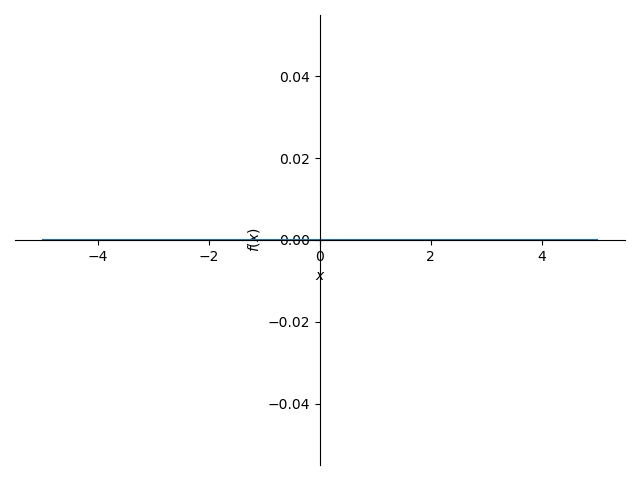

In [8]:
t = sym.symbols('t')
x = sym.Piecewise((0, True))
p1 = sym.plot(x, (t, -5, 5))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_ylabel(r'$X(j\omega)$')
ax.set_xlabel(r'$\omega$')
ax.arrow(3,0,0,np.pi-0.1, width=0.03, head_width = 0.2, head_length=0.1)
ax.arrow(-3,0,0,np.pi-0.1, width=0.03, head_width = 0.2, head_length=0.1)
plt.ylim(-0.1,4)
fig.canvas.draw_idle()

---

---

### Exemplo 1

Vamos calcular a transformada de Fourier de:

$x(t) = u(t+0.1) - u(t-0.1)$

A transformada de Fourier desse sinal é:

$X(j\omega) = \int_{-\infty}^{\infty} (u(t+0.1)-u(t-0.1))e^{-j\omega t}\,dt =  \int_{-0.1}^{\infty} e^{-j\omega t}\,dt -  \int_{0.1}^{\infty} e^{-j\omega t}\,dt = \left.\frac{e^{-j\omega t}}{-j\omega}\right|_{t=-0.1}^\infty - \left.\frac{e^{-j\omega t}}{-j\omega}\right|_{t=0.1}^\infty = \left.\frac{e^{-j\omega t}}{-j\omega}\right|_{t=\infty} - \frac{e^{j\omega 0.1}}{-j\omega} - \left.\frac{e^{-j\omega t}}{-j\omega}\right|_{t=\infty} + \frac{e^{-j\omega 0.1}}{-j\omega}=2\frac{\mathrm{sen}(0,1\omega)}{\omega}$

---

## Outras propriedades da transformada de Fourier



### Convolução

### Multiplicação

Se $\mathcal{F}(x_1(t)) = X_1(j\omega)$ e$\mathcal{F}(x_2(t)) = X_2(j\omega)$, 

então:

$\boxed{\mathcal{F}(x_1(t)x_2(t)) = X_1(j\omega)*X_2(j\omega)}$

### Atraso

### Derivada

### Integral




## Exercícios

## Referências

- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
